# Exemplo usando o Pandas

Importando as bibliotecas.

In [ ]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean,hmean
from scipy import stats

Carregando a base de dados.

In [ ]:
df = sns.load_dataset("iris")

## Visualizando a distribuição de tamanho e largura das pétalas e sépalas de cada espécie

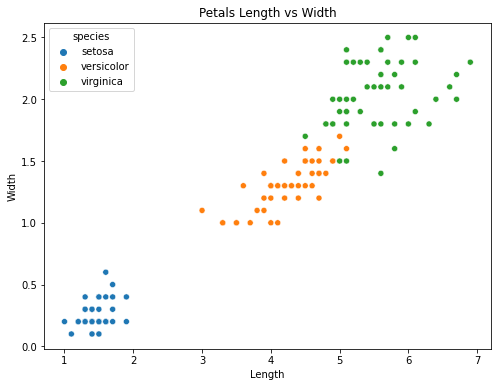

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = 'petal_length', y = 'petal_width', hue='species')
plt.title('Petals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
plt.show()

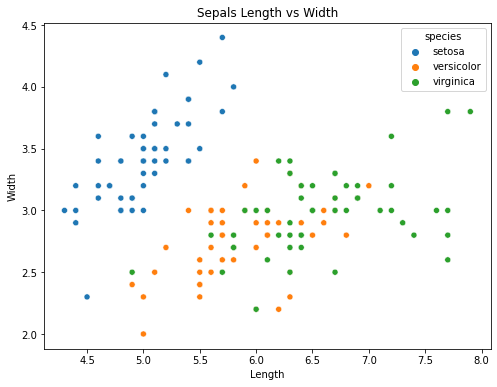

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x = 'sepal_length', y = 'sepal_width', hue='species')
plt.title('Sepals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
plt.show()

  Através dos dois gráficos de dispersão plotados, fica visualmente destacado o fato de que a espécie setosa é mais diferenciável que ambas as outras espécies tanto relativo ao seu tamanho e largura da pétala quanto ao de sépala. 

  Do gráfico Petals Length vs Width é possível notar que a largura da pétala das setosas não chega a 1 cm ficando próximo de 0.7 cm, enquanto que o tamanho de sua pétala chega próximo a 2 cm. Ainda sobre esse gráfico, podemos notar que a largura da pétala das versicolores fica entre 1 cm e 1.7 cm, ao passo que a largura da pétala das virgínicas fica em torno de 1.4 cm e 2.5 cm e por conta da intersecção dos intervalos das larguras das pétalas de versicolores e virgínicas, não é possível diferenciá-las tão facilmente apenas com essa informação, porém no caso de usarmos um modelo de classificação simples seria possível traçar uma reta que separa a espécie das setosas das outras espécies.

  Analisando agora o gráfico de dispersão Sepals Length vs Width nota-se que novamente a espécie setosa pode ser melhor diferenciada, porém diferente de como apenas com os tamanhos e larguras de pétala de forma isolada podia-se diferenciá-las, pois é preciso a combinação das duas informações sobre as sépalas. Assim, visualmente é possível inferir que as sépalas das setosas possuem entre 2.8 cm e 4.4 cm (considerando que o ponto mais isolado indica um outlier) de largura **e** entre 2 cm e 5.8 cm de tamanho. Já em relação às espécies versicolor e virgínica notamos que é muito complicado visualmente distinguí-las pois seus tamanhos e larguras de sépala possuem um intervalo quase idêntico.

## Verificando os dados.

In [ ]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
sepal_length,5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,5.4,4.8,4.8,4.3,5.8,5.7,5.4,5.1,5.7,5.1
sepal_width,3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,3.7,3.4,3.0,3.0,4.0,4.4,3.9,3.5,3.8,3.8
petal_length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,1.5,1.6,1.4,1.1,1.2,1.5,1.3,1.4,1.7,1.5
petal_width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,0.2,0.2,0.1,0.1,0.2,0.4,0.4,0.3,0.3,0.3
species,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa


## Verificando as informações do conjunto de dados.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Recuperando cada atributo em variáveis para análises individuais

In [ ]:
selen = df["sepal_length"]

In [ ]:
sewid = df["sepal_width"]

In [ ]:
pelen = df["petal_length"]

In [ ]:
pewid = df["petal_width"]

## Separando dados das espécies

In [ ]:
df_set = df.loc[(df['species'] == 'setosa')] #Setosas

In [ ]:
df_ver = df.loc[(df['species'] == 'versicolor')] #Versicolores

In [ ]:
df_vir = df.loc[(df['species'] == 'virginica')] #Virgínicas

### Analisando os dados de cada espécie:

In [ ]:
df_set.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.006,0.352490,4.3,4.8,5.0,5.200,5.8
sepal_width,50.0,3.428,0.379064,2.3,3.2,3.4,3.675,4.4
petal_length,50.0,1.462,0.173664,1.0,1.4,1.5,1.575,1.9
petal_width,50.0,0.246,0.105386,0.1,0.2,0.2,0.300,0.6


4.3 cm <= Tamanho da sépala <= 5.8 cm 

2.3 cm <= Largura da sépala <= 4.4 cm 

1.0 cm <= Tamanho da pétala <= 1.9 cm 

0.1 cm <= Largura da pétala <= 0.6 cm

menores dp: Largura da pétala = 0.105 e Tamanho da pétala = 0.173

In [ ]:
df_ver.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0
sepal_width,50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4
petal_length,50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1
petal_width,50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8


4.9 cm <= Tamanho da sépala <= 7.0 cm 

2.0 cm <= Largura da sépala <= 3.4 cm 

3.0 cm <= Tamanho da pétala <= 5.1 cm 

1.0 cm <= Largura da pétala <= 1.8 cm

menores dp: Largura da pétala = 0.197 e Largura da sépala = 0.313

In [ ]:
df_vir.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9
sepal_width,50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8
petal_length,50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9
petal_width,50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5


4.9 cm <= Tamanho da sépala <= 7.9 cm 

2.2 cm <= Largura da sépala <= 3.8 cm 

4.5 cm <= Tamanho da pétala <= 6.9 cm 

1.4 cm <= Largura da pétala <= 2.5 cm

menores dp: Largura da pétala = 0.274 e Largura da sépala = 0.322

Através da descrição numérica feita para cada atributo de todas as espécies é possível comprovar o que foi suposto de modo visual, em  que:

tamanho das pétalas de setosas < tamanho das pétalas de versicolores e virgínicas; 
largura das pétalas de setosas < largura das pétalas de versicolores e virgínicas

Porém nada se pode afirmar com exatidão a respeito dos tamanhos e larguras, isoladamente, de sépalas de cada espécie. Ainda assim, aparentemente há uma tendência de setosas terem sépalas mais largas e menos compridas que as demais, enquanto que as virginicas aparentam ter Sépalas mais compridas. E ao combinar-se o que mostra o gráfico de dispersão das medidas das sépalas com os números obtidos, percebe-se que o tamanho mínimo das sépalas de versicolores e virgínicas é o mesmo por conta de um outlier presente no grupo das virgínicas.

Ademais é possível notar que dentre as medidas analisadas, a que possui maior homogeneidade em todas as espécies é a largura das pétalas, pois possui menor desvio padrão.

## Plotagem dos gráficos por espécie

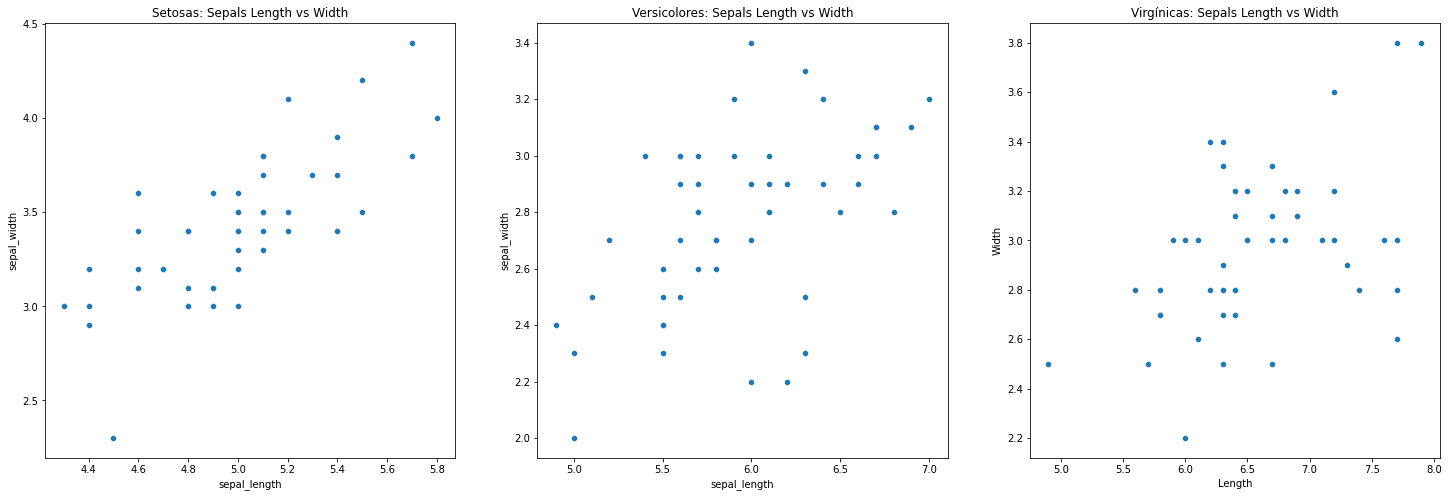

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25, 8))
sns.scatterplot(data=df_set, x = 'sepal_length', y = 'sepal_width',ax=axes[0])
axes[0].title.set_text('Setosas: Sepals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
sns.scatterplot(data=df_ver, x = 'sepal_length', y = 'sepal_width',ax=axes[1])
axes[1].title.set_text('Versicolores: Sepals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
sns.scatterplot(data=df_vir, x = 'sepal_length', y = 'sepal_width',ax=axes[2])
axes[2].title.set_text('Virgínicas: Sepals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
plt.show()


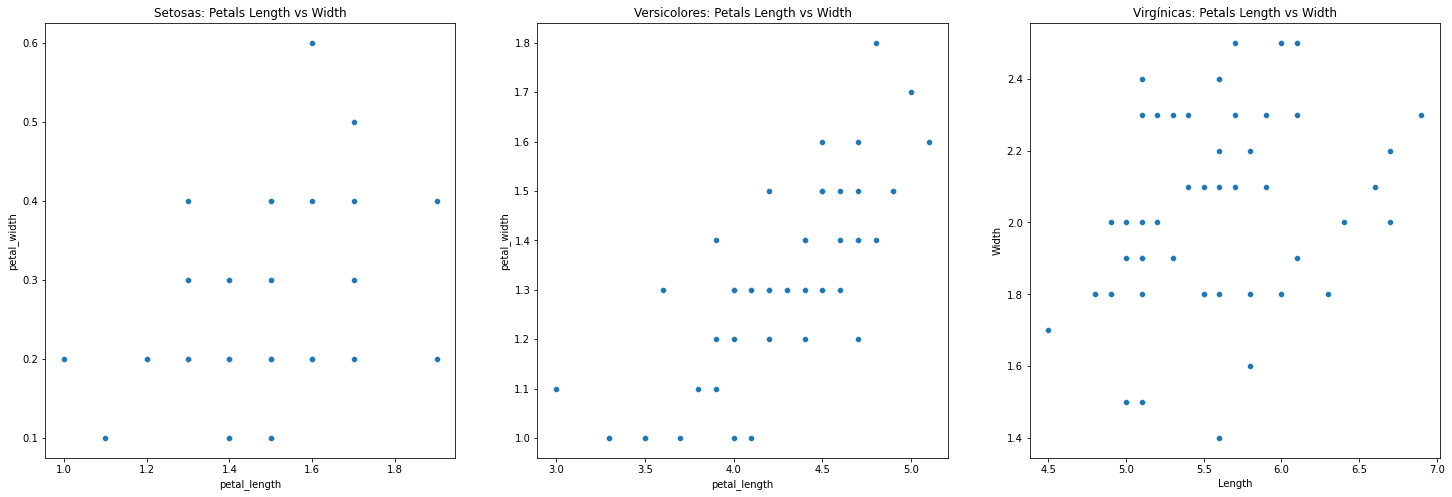

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25, 8))
sns.scatterplot(data=df_set, x = 'petal_length', y = 'petal_width',ax=axes[0])
axes[0].title.set_text('Setosas: Petals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
sns.scatterplot(data=df_ver, x = 'petal_length', y = 'petal_width',ax=axes[1])
axes[1].title.set_text('Versicolores: Petals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
sns.scatterplot(data=df_vir, x = 'petal_length', y = 'petal_width',ax=axes[2])
axes[2].title.set_text('Virgínicas: Petals Length vs Width')
plt.ylabel('Width')
plt.xlabel('Length')
plt.show()

# Medidas de Assimetria
Nos possibilitam analisar uma distribuição em relação a sua moda, mediana e média.

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew
%matplotlib inline

## Função para calcular estatísticas.

In [ ]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,mode,median,var,std,coef_pearson,coef_kurtosis))
  return msg

In [ ]:
calcula_estatisticas(selen)

Media: 5.84
Moda: 5.0
Mediana: 5.8
Variância: 0.68
Desvio Padrão: 0.83
Coeficiente Person: 0.31
Coeficiente de Kurtosi: -0.57


Tamanho da sépala: Moda: 5.0 < Mediana: 5.8 < Media: 5.84

A distribuição dos dados é assimétrica positiva.



In [ ]:
calcula_estatisticas(sewid)

Media: 3.06
Moda: 3.0
Mediana: 3.0
Variância: 0.19
Desvio Padrão: 0.43
Coeficiente Person: 0.32
Coeficiente de Kurtosi: 0.18


Largura da sépala: Moda: 3.0 <= Mediana: 3.0 < Media: 3.06

A distribuição dos dados é assimétrica positiva.

In [ ]:
calcula_estatisticas(pelen)

Media: 3.76
Moda: 1.4
Mediana: 4.35
Variância: 3.1
Desvio Padrão: 1.76
Coeficiente Person: -0.27
Coeficiente de Kurtosi: -1.4


Tamanho da pétala: Moda: 1.4 < Media: 3.76

A distribuição dos dados é assimétrica positiva.

In [ ]:
calcula_estatisticas(pewid)

Media: 1.2
Moda: 0.2
Mediana: 1.3
Variância: 0.58
Desvio Padrão: 0.76
Coeficiente Person: -0.1
Coeficiente de Kurtosi: -1.34


Largura da pétala: Moda: 0.2 < Media: 1.2

A distribuição dos dados é assimétrica positiva.

Verificando graficamente as distribuições dos atributos do Dataframe

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

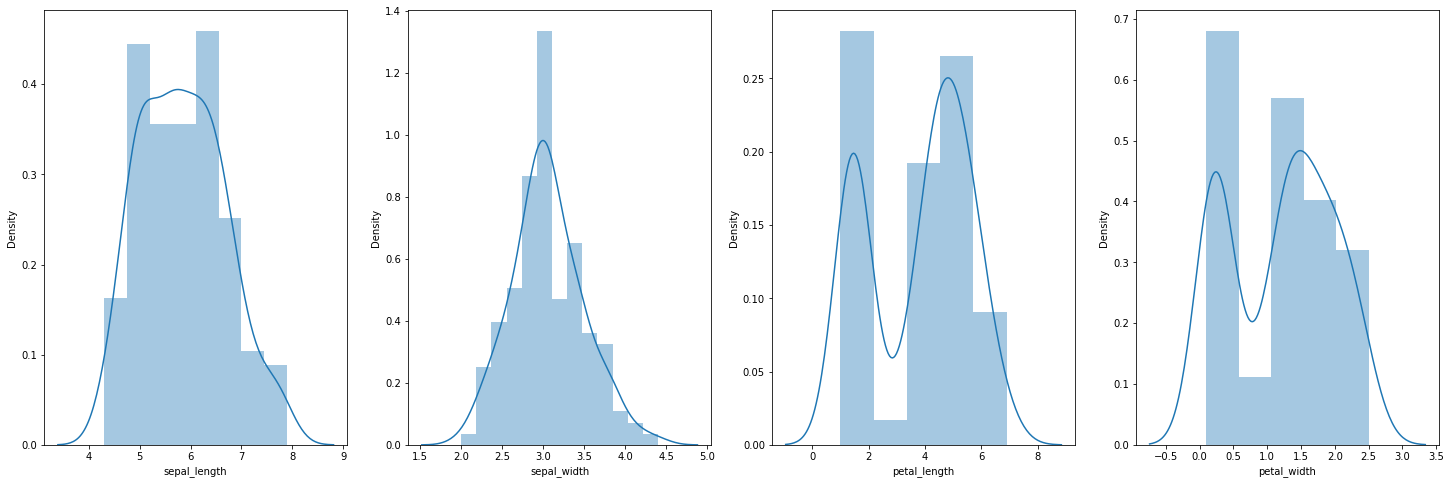

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(25, 8))
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    sns.distplot(df[column],ax=axes[i%4])

##Verificando a distribuição de probabilidade e a diferença entre a média e a mediana.

In [ ]:
for i, column in enumerate(df.select_dtypes(include=np.number).columns.tolist()):
    media = round(df[column].mean(),2)
    std = df[column].std()
    cvar = round(std/media*100,2)
    median = df[column].median()
    print("Atributo: {}, Coeficiente de Variação: {} %, Media: {}, Mediana: {}".format(column,cvar,media,median))

Atributo: sepal_length, Coeficiente de Variação: 14.18 %, Media: 5.84, Mediana: 5.8
Atributo: sepal_width, Coeficiente de Variação: 14.24 %, Media: 3.06, Mediana: 3.0
Atributo: petal_length, Coeficiente de Variação: 46.95 %, Media: 3.76, Mediana: 4.35
Atributo: petal_width, Coeficiente de Variação: 63.52 %, Media: 1.2, Mediana: 1.3


## Visualizando a correlação dos dados:

In [ ]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.0,-0.12,0.87,0.82
sepal_width,-0.12,1.0,-0.43,-0.37
petal_length,0.87,-0.43,1.0,0.96
petal_width,0.82,-0.37,0.96,1.0


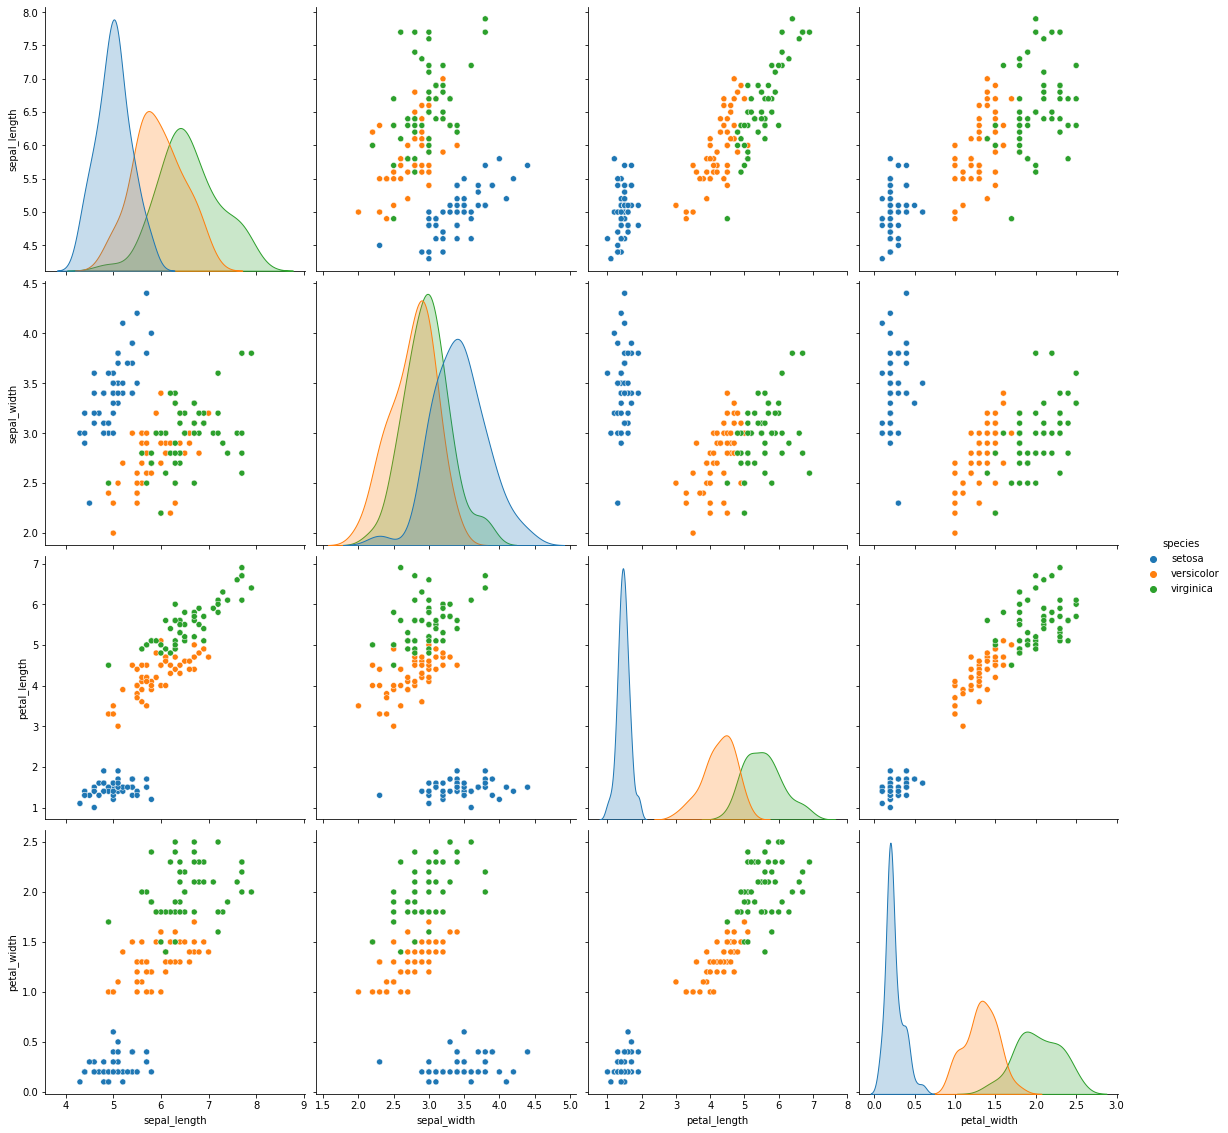

In [ ]:
sns.pairplot(df, height=4, hue='species')
# to show
plt.show()

As plotagens numérica e gráfica mostradas reforçam a grande correlação entre os atributos da pétala que são fortes fatores que distinguem as três espécies de plantas.